In [10]:
# -- Import Libraries -- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets 
import sklearn.model_selection as model_selection

In [2]:
def plt_iris_data(iris):
    plt.title('Iris Dataset')
    
    plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    
    plt.tight_layout()
    plt.show()

In [3]:
# -- handling the data -- 
iris = datasets.load_iris() 
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.2, 
                                                                    shuffle=True)

In [18]:
#type(iris)
iris.data.shape

(150, 4)

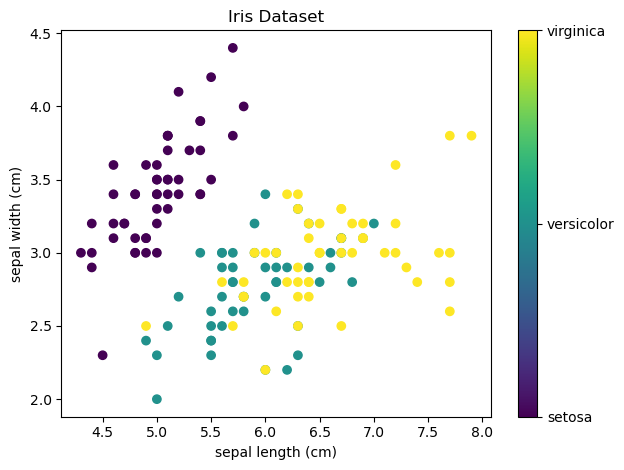

In [4]:
# -- plot iris data -- 
plt_iris_data(iris)

In [5]:
# -- define KNN model --
class KNN:
    def __init__(self, X_train, Y_train, k):
        self.X_train = X_train
        self.Y_train = Y_train
        self.k = k
        
    def euclidean_distance(self, inst1, inst2):
        '''
        calculate the euclidean distance between 2 rows in the dataset
        
        distance = sqrt( sum ( (inst1[i] - inst2[i])^2 ))
        
        Parameters
        ----------
        inst1 : array like
        inst2 : array like
    
        Returns
        -------
        distance: float
            the euclidean distance between 2 vectors.
            
        '''
        distance = np.linalg.norm(inst1-inst2)
        return distance
    
    def get_k_neighbors(self, inst1):
        '''
        This function return k most close neighbors of inst1
        
        Parameters
        ----------
        inst1 : array like
        k : int
        dataset : array like
    
        Returns
        -------
        k_neighbors : list
        
        '''
        # calc distances from inst
        distances = []
        for inst2 in self.X_train:
            distances.append(self.euclidean_distance(inst1, inst2))
        
        distances = np.asarray(distances)
        
        # argpartition will sort the array and return thier indices in the original array, 
        # (it will place the smalles values in the first k places, and will not continue to sort the rest of the values)
        indices = np.argpartition(distances,self.k)
        
        # return the first k neighbors indices
        k_first_indices = indices[:self.k]  
        
        return k_first_indices
    
    def predict_class(self, inst1):
        '''

        Parameters
        ----------
        inst1 : array like
            a vector that we try to predict its class

        Returns
        -------
        mode : int
            the class of inst1

        '''
        knn_indices = self.get_k_neighbors(inst1)
        knn_labels = []
        for i in knn_indices:
            knn_labels.append(self.Y_train[i])
        
        # count number of occurrences of each value
        occurrences = np.bincount(knn_labels)
        
        # clac inst1 label by finding the mode 
        mode = np.argmax(occurrences)
        
        return mode
    
    def get_accuracy(self, y_test, predictions):
        correct = y_test == predictions
        acc = ( np.sum(correct) / y_test.shape[0] ) * 100.0
        return acc

In [33]:
# -- try for different values of k -- 
K = [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50, 100]
    
for k in K:
    classifier = KNN(X_train, y_train, k)
        
    # -- Test Acc -- 
    predictions=[]
    for inst in X_test:
        predictions.append(classifier.predict_class(inst))
        
    acc = classifier.get_accuracy(y_test, predictions)
        
    print("accuracy for k=", k, ": ", acc, "%")

accuracy for k= 1 :  96.66666666666667 %
accuracy for k= 2 :  96.66666666666667 %
accuracy for k= 3 :  96.66666666666667 %
accuracy for k= 5 :  96.66666666666667 %
accuracy for k= 8 :  96.66666666666667 %
accuracy for k= 9 :  96.66666666666667 %
accuracy for k= 10 :  100.0 %
accuracy for k= 11 :  100.0 %
accuracy for k= 12 :  100.0 %
accuracy for k= 13 :  96.66666666666667 %
accuracy for k= 14 :  100.0 %
accuracy for k= 15 :  96.66666666666667 %
accuracy for k= 16 :  100.0 %
accuracy for k= 17 :  96.66666666666667 %
accuracy for k= 18 :  96.66666666666667 %
accuracy for k= 19 :  96.66666666666667 %
accuracy for k= 50 :  96.66666666666667 %
accuracy for k= 100 :  60.0 %


In [24]:
k_ideal = np.sqrt(iris.data.shape[0])

In [25]:
k_ideal

12.24744871391589